# ODE problems

## Objectives

* Discuss debuggers
* Solve a BVP
* Look at some other ODE problems

## Debugging

Using a debugger has several parts:

* Starting the debugger
    * Classic way: `import pdb; pdb.set_trace()` (This is the standard library debugger)
    * Python 3.7 way: `breakpoint()` (This will start the current debugger)
    * IPython offers `%debug` to jump in *after* an error is raised! (like `pdb.pm()`)
    * You can also start at the beginning (see [docs](https://docs.python.org/3.7/library/pdb.html))
* Controlling the debugger
    * `pyb` (and `ipydb`) are sort of based on classic debugging tools - the syntax is a bit odd, but will be useful in other languages.
    * A common term is the "stack", short in this case for the "call-stack", the series of functions that call each other to get to the current point.
        * Note that the "stack" is also a term for memory locations in compiled programs - and is unrelated to this usage.

| short | name          | action | Names in other debuggers |
|-------|---------------|--------|--------------------------|
| `h`   | `help`        | Print out help | |
| `p`   | `print`       | Print out the value of a variable or expression | |
| `u`   | `up`          | Go up one in the stack| |
| `d`   | `down`        | Go down one in the stack | |
| `w`   | `where`       | Show you where you are | Stack trace |
| `s`   | `step`        | Move forward one computation | Step in |
| `n`   | `next`        | More forward one line | Step over |
| `c`   | `continue`    | Continue on till next stop | |
| `b`   | `breakpoint`  | Set a breakpoint somehere | |
| `q`   | `quit`        | Quit | |

In [2]:
## A program to debug
def simple_function(div):
    simple_x = 2
    simple_y = div

    # When the line below is executed, Python stops and waits for you to tell it what to do next
    # ou’ll see a (Pdb) prompt. This means that you’re now paused in the interactive 
    # debugger and can enter a command.
    import pdb; pdb.set_trace()

    return fancy_function(simple_x, simple_y)


def fancy_function(x, y):
    r = x / y
    return r

In [4]:
simple_function(0)

> /var/folders/sd/7rq2vwcx7fd8stfzsvfnz9980000gq/T/ipykernel_88296/3900354869.py(8)simple_function()
      6     import pdb; pdb.set_trace()
      7 
----> 8     return fancy_function(simple_x, simple_y)
      9 
     10 

ipdb> simple_x
2
ipdb> simple_y
0
ipdb> break
ipdb> continue


ZeroDivisionError: division by zero

In [5]:
# starting Python 3.6
# By default, breakpoint() will import pdb and call pdb.set_trace()
#
# using breakpoint() is more flexible and allows you to control debugging behavior via its 
# API and use of the environment variable PYTHONBREAKPOINT
breakpoint()


--Call--
> /Users/aldoromero/opt/anaconda3/lib/python3.8/site-packages/IPython/core/displayhook.py(252)__call__()
    250         sys.stdout.flush()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.
    254 

ipdb> simple_x
*** NameError: name 'simple_x' is not defined
ipdb> continue


You can also run as a script

```
python3 -m pdb app.py arg1 arg2
```

In [6]:
%debug

> /var/folders/sd/7rq2vwcx7fd8stfzsvfnz9980000gq/T/ipykernel_88296/3900354869.py(12)fancy_function()
      9 
     10 
     11 def fancy_function(x, y):
---> 12     r = x / y
     13     return r

ipdb> r


In [7]:
simple_function(2)

> /var/folders/sd/7rq2vwcx7fd8stfzsvfnz9980000gq/T/ipykernel_88296/3900354869.py(8)simple_function()
      6     import pdb; pdb.set_trace()
      7 
----> 8     return fancy_function(simple_x, simple_y)
      9 
     10 

ipdb> simple_x
2
ipdb> continue


1.0

In [8]:
import pdb

In [9]:
pdb.run('simple_function(0)')

> <string>(1)<module>()

ipdb> simple_x
*** NameError: name 'simple_x' is not defined
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
> /var/folders/sd/7rq2vwcx7fd8stfzsvfnz9980000gq/T/ipykernel_88296/3900354869.py(8)simple_function()
      6     import pdb; pdb.set_trace()
      7 
----> 8     return fancy_function(simple_x, simple_y)
      9 
     10 

ipdb> continue


ZeroDivisionError: division by zero

### Other tools: Tracing

Some IDEs, like PyCharm, may offer enhanced and partially graphical debuggers. And, in Python 3.7, the new built-in `breakpoint()` can call the fancy debugger instead of the builtin one!

Let's look at something similar: Tracing. If you have a complex piece of Python code and you want to have an idea of what the control flow looks like, you can trace it.

In [11]:
%%writefile simple.py

## A program to debug
def simple_function(div):
    simple_x = 2
    simple_y = div

    return fancy_function(simple_x, simple_y)


def fancy_function(x, y):
    r = x / y
    return r


def main():
    print(simple_function(2))


if __name__ == "__main__":
    main()

Writing simple.py


In [12]:
!python simple.py

1.0


In [13]:
!python -m trace --trace simple.py

 --- modulename: simple, funcname: <module>
simple.py(3): def simple_function(div):
simple.py(10): def fancy_function(x, y):
simple.py(15): def main():
simple.py(19): if __name__ == "__main__":
simple.py(20):     main()
 --- modulename: simple, funcname: main
simple.py(16):     print(simple_function(2))
 --- modulename: simple, funcname: simple_function
simple.py(4):     simple_x = 2
simple.py(5):     simple_y = div
simple.py(7):     return fancy_function(simple_x, simple_y)
 --- modulename: simple, funcname: fancy_function
simple.py(11):     r = x / y
simple.py(12):     return r
1.0


In [14]:
!python -m trace --listfuncs simple.py

1.0

functions called:
filename: simple.py, modulename: simple, funcname: <module>
filename: simple.py, modulename: simple, funcname: fancy_function
filename: simple.py, modulename: simple, funcname: main
filename: simple.py, modulename: simple, funcname: simple_function


## Boundary value problems (BPV)

### DUAL ALGORITHMS: EIGENVALUES VIA ODE SOLVER + SEARCH

Let us for now focus on Quantum Mechanical problems.

The solution of the eigenvalue problem combines the numerical solution of the ordinary differential equation with a trial-and-error search for a wave function that satisfies the boundary conditions. This is done in several steps:

* Start on the very far left at $x = −X_{max} \sim −\infty$, where $X_{max} \gg a$. Since the potential
$V = 0$ in this region, the analytic solution here is $e^{\pm κx}$. Accordingly, assume that the
wave function there satisfies the left-hand boundary condition $\psi_L(x=-X_{max}) = e^{κx}=e^{-κX_{max}}$.

* Use your favorite ODE solver to step $\psi_L (x)$ in toward the origin (to the right) from
$x = −X_{max}$ until you reach the matching radius $x_{match}. The exact value of this matching
radius is not important, and our final solution should be independent of it. 

* Start on the very far right, that is, at $x = +X_{max} \sim +\infty$, with a wave function that
satisfies the right-hand boundary condition $\psi_L(x=X_{max}) = e^{-κx}=e^{κX_{max}}$

* Use your favorite ODE solver (e.g., rk4) to step $\psi_R (x)$ in toward the origin (to the left)
from $x = X_{max}$ until you reach the matching radius $x_{match}$. 

* In order for probability and current to be continuous at $x=x_{match}$, $\psi (x)$ and $\psi ' (x)$ must
be continuous there. Requiring the ratio $\psi ' (x)/\psi (x)$, called the logarithmic derivative,
to be continuous encapsulates both continuity conditions into a single condition and is
independent of $\psi (x)$’s normalization.

* Even though we do not know ahead of time which energies $E$ or κ values are eigenvalues,
we still need a starting value for the energy in order to use our ODE solver. Such being
the case, we start the solution with a guess for the energy. A good guess for ground-state
energy would be a value somewhat up from that at the bottom of the well, $E > −V_0$.

* Because it is unlikely that any guess will be correct, the left- and right-wave functions
will not quite match at $x = x_{match}$. This is okay because we can use the
amount of mismatch to improve the next guess. We measure how well the right and left
wave functions match by calculating the difference

$$
\Delta(E,x) = \frac{\psi_L'/\psi_L - \psi_R'/\psi_R}{\psi_L'/\psi_L + \psi_R'/\psi_R}|_{x=x_{match}}
$$


where the denominator is used to avoid overly large or small numbers. Next we try a
different energy, note how much $\Delta(E)$ has changed, and use this to deduce an intelligent
guess at the next energy. The search continues until the left- and right-wave $\psi'/\psi$ match
within some tolerance.

Let's look at a square well:



In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

$$
\begin{align}
\psi'' + \left( \frac{2 m}{\hbar^2} V_0 - \kappa^2 \right) \psi = 0,& \quad \textrm{for }|x|\le a \\
\psi'' -  \kappa^2 \psi = 0,&
\quad \textrm{for }|x| > a
\end{align}
$$

Again, we write this as a set of first order equations:

$$
u = \left(\begin{matrix}\psi' \\ \psi\end{matrix}\right)
$$

$$
u' = \left(\begin{matrix}\psi'' \\ \psi'\end{matrix}\right)
= \left(\begin{matrix}\left( \frac{2 m}{\hbar^2} V_0 - \kappa^2 \right) \psi \\ \psi'\end{matrix}\right)
$$

where we set $V_0$ to $0$ when $|x|$ is larger than $a$. Boundary conditions:

$$
\psi(x_\mathrm{max}) = e^{-\kappa x_\mathrm{max}} \\
\psi(-x_\mathrm{max}) = e^{-\kappa x_\mathrm{max}}
$$


Double click to see broken code for `solve_bvp` (in a live notebook, not a viewer).

<!--

```python
width = 10

def f(x, y, p):
    E, = p
    V = np.where(abs(x) < 10, -16, 0)
    return np.vstack([y[1], -0.4829*(E - V)*y[0]])

def bc(ya, yb, p):
    E, = p
    κ = np.sqrt(0.0483 * abs(E) * 10)
    bc = np.exp(-κ * width)

    return np.array([ya[0] - bc, yb[0] - bc, ya[1] + yb[1]])

x = np.linspace(-width, width, 100)
y = np.ones([2,len(x)])

res = scipy.integrate.solve_bvp(f, bc, x, y, p=[-17])
print(res.message)
print('p =', res.p[0])

plt.plot(res.x, res.y[0])
```

-->

-17.077272727272728


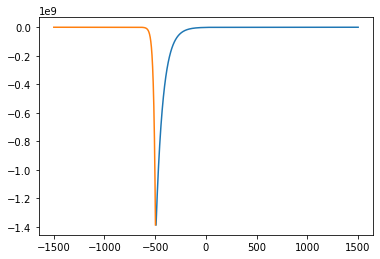

-16.26590909090909


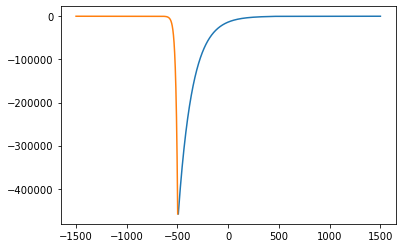

-15.860227272727272


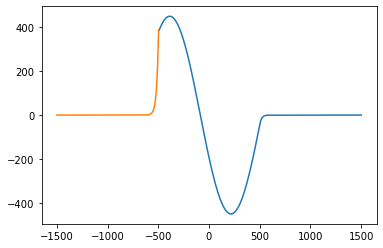

-16.06306818181818


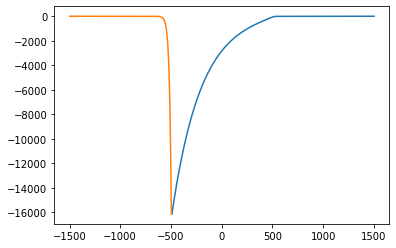

-15.961647727272727


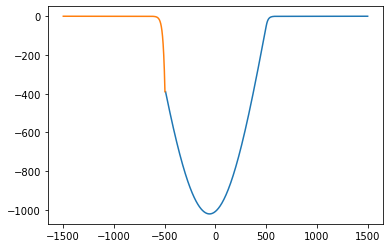

-15.9109375


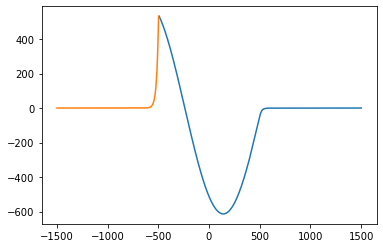

-15.936292613636363


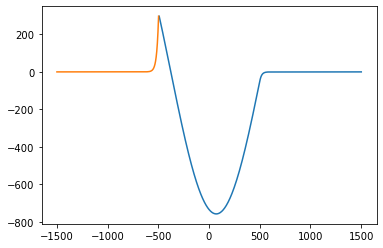

-15.948970170454544


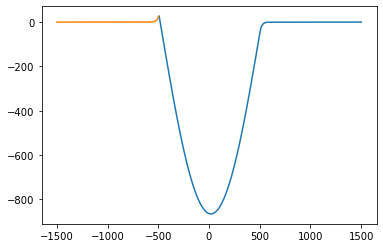

-15.955308948863635


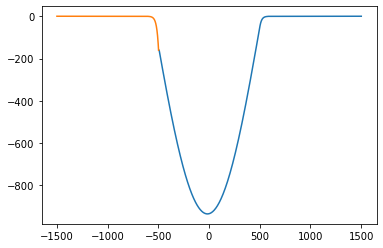

-15.95213955965909


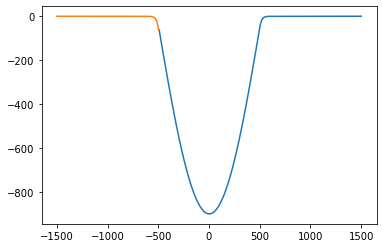

-15.950554865056816


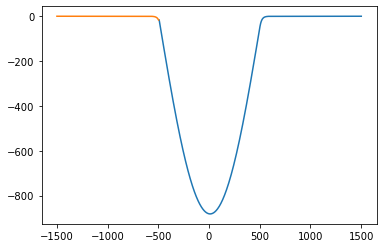

-15.951347212357952


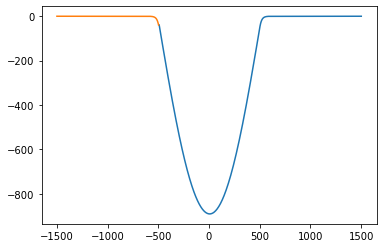

-15.95174338600852


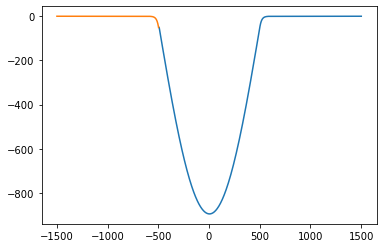

-15.951941472833806


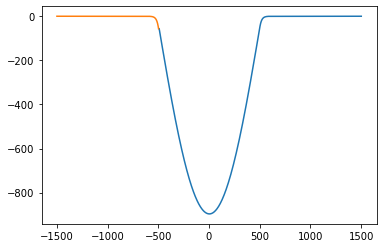

-15.952040516246448


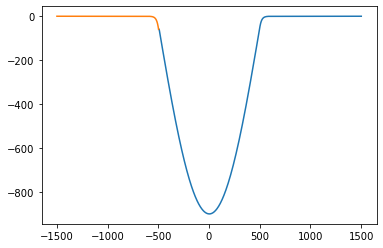

Final eigenvalue E =  -15.952090037952768
iterations, max =  15


In [23]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2017. 
    Please respect copyright & acknowledge our work."""

# QuantumEigen.py:             Finds E and psi via rk4 + bisection

# mass/((hbar*c)**2)= 940MeV/(197.33MeV-fm)**2 =0.4829
# well width=20.0 fm, depth 10 MeV, Wave function not normalized.

import numpy as np
import matplotlib.pyplot as plt

eps = 1e-3  # Precision
n_steps = 501
E = -17  # E guess
h = 0.04
count_max = 100
Emax = 1.1 * E  # E limits
Emin = E / 1.1


def f(x, y, E):
    return np.array([y[1], -0.4829 * (E - V(x)) * y[0]])


def V(x):
    # Well depth
    return -16 if abs(x) < 10 else 0


def rk4(t, y, h, Neqs, E):
    ydumb = np.zeros((Neqs), float)
    k1 = np.zeros((Neqs), float)
    k2 = np.zeros((Neqs), float)
    k3 = np.zeros((Neqs), float)
    k4 = np.zeros((Neqs), float)

    F = f(t, y, E)
    k1 = h * F
    ydumb = y + k1 / 2

    F = f(t + h / 2, ydumb, E)
    k2 = h * F
    ydumb = y + k2 / 2

    F = f(t + h / 2, ydumb, E)
    k3 = h * F
    ydumb = y + k3

    F = f(t + h, ydumb, E)
    k4 = h * F

    y += (k1 + 2 * (k2 + k3) + k4) / 6


def diff(E, h):
    i_match = n_steps // 3  # Matching radius
    nL = i_match + 1

    y = np.array([1e-15, 1e-15 * np.sqrt(-E * 0.4829)])  # Initial left wf

    for ix in range(0, nL + 1):
        x = h * (ix - n_steps / 2)
        rk4(x, y, h, 2, E)

    left = y[1] / y[0]  # Log  derivative

    y[0] = 1e-15
    # For even;  reverse for odd
    y[1] = -y[0] * np.sqrt(-E * 0.4829)  # Initialize R wf

    for ix in range(n_steps, nL + 1, -1):
        x = h * (ix + 1 - n_steps / 2)
        rk4(x, y, -h, 2, E)

    right = y[1] / y[0]  # Log derivative
    return (left - right) / (left + right)


def plot(E, h):
    # Repeat integrations for plot
    x = 0.0
    n_steps = 1501  # integration steps

    y = np.zeros((2), float)
    yL = np.zeros((2, 505), float)
    i_match = 500  # Matching point
    nL = i_match + 1

    y[0] = 1e-40  # Initial left wf
    y[1] = -np.sqrt(-E * 0.4829) * y[0]

    for ix in range(nL + 1):
        yL[0][ix] = y[0]
        yL[1][ix] = y[1]
        x = h * (ix - n_steps / 2)
        rk4(x, y, h, 2, E)

    y[0] = -1.0e-15  # For even;  reverse for odd
    y[1] = -np.sqrt(-E * 0.4829) * y[0]
    j = 0

    Rwf_x = np.zeros(n_steps - 3 - nL)
    Rwf_y = np.zeros(n_steps - 3 - nL)
    for ix in range(n_steps - 1, nL + 2, -1):  # right WF
        x = h * (ix + 1 - n_steps / 2)  # Integrate in
        rk4(x, y, -h, 2, E)
        Rwf_x[j] = 2 * (ix + 1 - n_steps / 2)
        Rwf_y[j] = y[0] * 35e-9
        j += 1
    x = x - h
    normL = y[0] / yL[0][nL]
    j = 0

    # Renormalize L wf & derivative
    Lwf_x = np.zeros(nL + 1)
    Lwf_y = np.zeros(nL + 1)
    for ix in range(nL + 1):
        x = h * (ix - n_steps / 2 + 1)
        y[0] = yL[0][ix] * normL
        y[1] = yL[1][ix] * normL
        Lwf_x[j] = 2 * (ix - n_steps / 2 + 1)
        Lwf_y[j] = y[0] * 35e-9  # Factor for scale
        j += 1

    print(E)
    plt.plot(Rwf_x, Rwf_y)
    plt.plot(Lwf_x, Lwf_y)
    plt.show()


for count in range(0, count_max + 1):
    # Iteration loop
    E = (Emax + Emin) / 2  # Divide E range
    Diff = diff(E, h)

    if diff(Emax, h) * Diff > 0:
        Emax = E  # Bisection algor
    else:
        Emin = E

    if abs(Diff) < eps:
        break

    plot(E, h)


print("Final eigenvalue E = ", E)
print("iterations, max = ", count)

## Problem 2: Projectile motion with drag

We can select a power $n=1$ or $2$. The friction coefficient is $k$.

$$
\ddot{x} = - k \dot{x}^n \frac{\dot{x}}{v} \\
\ddot{y} = - g - k \dot{y}^n \frac{\dot{y}}{v} \\
v = \sqrt{\dot{x}^2 + \dot{y}^2}
$$

We can rewrite it:

$$
u = \left(\begin{matrix}
    x \\
    \dot{x} \\
    y \\
    \dot{y}
\end{matrix}\right)
$$

Then:

$$
\dot{u} = \left(\begin{matrix}
    \dot{x} \\
    - k \dot{x}^n \frac{\dot{x}}{v} \\
    \dot{y} \\
    - g - k \dot{y}^n \frac{\dot{y}}{v}
\end{matrix}\right)
=
\left(\begin{matrix}
    u_1 \\
    - k u_1^n \frac{u_1}{\sqrt{u_1^2 + u_3^2}} \\
    u_3 \\
    - g - k u_3^n \frac{u_3}{\sqrt{u_1^2 + u_3^2}}
\end{matrix}\right)
$$

We can set the initial positions to 0 and give it a starting velocity, and compare no friction to friction versions.

In [16]:
import scipy.integrate

In [17]:
v0 = 22
angle = 34
g = 9.8
k = 0.8
n = 1

v0x = v0 * np.cos(np.radians(angle))
v0y = v0 * np.sin(np.radians(angle))

t_eval = np.linspace(0, 2)
analytic_x = v0x * t_eval
analytic_y = v0y * t_eval - 0.5 * g * t_eval ** 2

In [18]:
def f(t, u):
    v = np.sqrt(u[1] ** 2 + u[3] ** 2)
    return np.stack(
        [u[1], -k * u[1] ** n * u[1] / v, u[3], -g - k * u[3] ** n * u[3] / v]
    )

In [19]:
res = scipy.integrate.solve_ivp(f, [0, 2], [0, v0x, 0, v0y], t_eval=t_eval)
print(res.message)

The solver successfully reached the end of the integration interval.


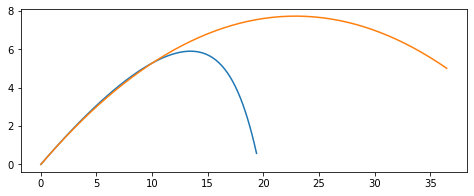

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(res.y[0], res.y[2])
plt.plot(analytic_x, analytic_y)

No Drag T = 2.510662015582945 , H = 7.7216941017014955 , R = 45.79152914391073

       With Friction  
       x            y
  1.5878444084   0.9841455183 
  3.0560925976   1.8072962748 
  4.4137525380   2.4815783725 
  5.6691537211   3.0182045781 
  6.8299982623   3.4275431141 
  7.9034081546   3.7191812700 
  8.8959689636   3.9019842221 
  9.8137702310   3.9841494227 
 10.6624428350   3.9732568932 
 11.4471935368   3.8763157289 
 12.1728369253   3.6998071009 
 12.8438249551   3.4497240195 
 13.4642742600   3.1316081022 
 14.0379914099   2.7505835728 
 14.5684962641   2.3113886991 
 15.0590435667   1.8184048634 
 15.5126429149   1.2756834428 
 15.9320772235   0.6869706652 
 16.3199197985   0.0557305932 

       No Friction  
        x            y
  0.0000000000   0.0000000000
  2.0606188115   1.3273592161
  4.1212376230   2.5296269877
  6.1818564344   3.6068033149
  8.2424752459   4.5588881976
 10.3030940574   5.3858816359
 12.3637128689   6.0877836298
 14.4243316803   6.6645941792
 

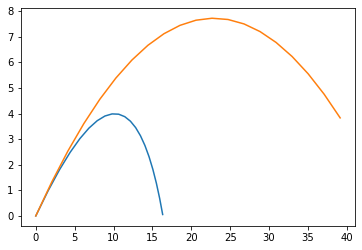

In [21]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2017. 
    Please respect copyright & acknowledge our work."""

# ProjectileAir.py: Order dt^2 projectile trajectory + drag

import numpy as np
import matplotlib.pyplot as plt

v0 = 22
angle = 34.0
g = 9.8
kf = 0.8
N = 20

v0x = v0 * np.cos(angle * np.pi / 180)
v0y = v0 * np.sin(angle * np.pi / 180)
T = 2 * v0y / g
H = v0y ** 2 / 2 / g
R = 2 * v0x * v0y / g

print("No Drag T =", T, ", H =", H, ", R =", R)


def plotNumeric(k):
    vx = v0 * np.cos(angle * np.pi / 180)
    vy = v0 * np.sin(angle * np.pi / 180)
    x = 0.0
    y = 0.0
    dt = vy / g / N * 1.5

    print("\n       With Friction  ")
    print("       x            y")

    xy = np.empty((2, N))
    xy[:, 0] = 0, 0

    for i in range(N - 1):
        vx = vx - k * vx * dt
        vy = vy - g * dt - k * vy * dt
        x = x + vx * dt
        y = y + vy * dt
        xy[:, i + 1] = x, y
        print(" %13.10f  %13.10f " % (x, y))

    plt.plot(*xy)


def plotAnalytic():
    v0x = v0 * np.cos(angle * np.pi / 180)
    v0y = v0 * np.sin(angle * np.pi / 180)
    dt = v0y / g / N * 1.8
    print("\n       No Friction  ")
    print("        x            y")

    xy = np.empty((2, N))
    for i in range(N):
        t = i * dt
        x = v0x * t
        y = v0y * t - g * t * t / 2
        xy[:, i] = x, y
        print(" %13.10f  %13.10f" % (x, y))

    plt.plot(*xy)


plotNumeric(kf)
plotAnalytic()